# Team Black Project

The data we have used is from Our World in Data and looks at the share of new passenger vehicle registrations that are battery electric vehicles. The data can be found at https://ourworldindata.org/transport.



### Importing the data

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import csv to google colab
from google.colab import files
uploaded = files.upload()

Saving share-vehicle-electric.csv to share-vehicle-electric.csv


In [2]:
data = pd.read_csv('data/share-vehicle-electric (4).csv')
data.head()

,Entity,Code,Year,battery_electric_share
0,Austria,AUT,2001,0.000000
1,Austria,AUT,2002,0.000358
2,Austria,AUT,2003,0.000000
3,Austria,AUT,2004,0.000000
4,Austria,AUT,2005,0.000000


In [9]:
#import the data
import io
data = pd.read_csv(io.BytesIO(uploaded['share-vehicle-electric.csv']))
data.head()

#data = pd.read_csv('share-vehicle-electric.csv')
#data.head()

,Entity,Code,Year,battery_electric_share
0,Austria,AUT,2001,0.000000
1,Austria,AUT,2002,0.000358
2,Austria,AUT,2003,0.000000
3,Austria,AUT,2004,0.000000
4,Austria,AUT,2005,0.000000


### Summary of the data

In [3]:
# summerised information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  309 non-null    object 
 1   Code                    307 non-null    object 
 2   Year                    309 non-null    int64  
 3   battery_electric_share  309 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.8+ KB


In [4]:
# summary statistics of integer/float data
data.describe()

,Year,battery_electric_share
count,309.000000,309.000000
mean,2010.501618,0.873659
std,5.573956,3.626734
min,2001.000000,0.000000
25%,2006.000000,0.000290
50%,2011.000000,0.023778
75%,2015.000000,0.387658
max,2020.000000,42.383059


In [5]:
# calculate how many missing values
print(data.isnull().sum())

Entity                    0
Code                      2
Year                      0
battery_electric_share    0
dtype: int64


### Visualising the data

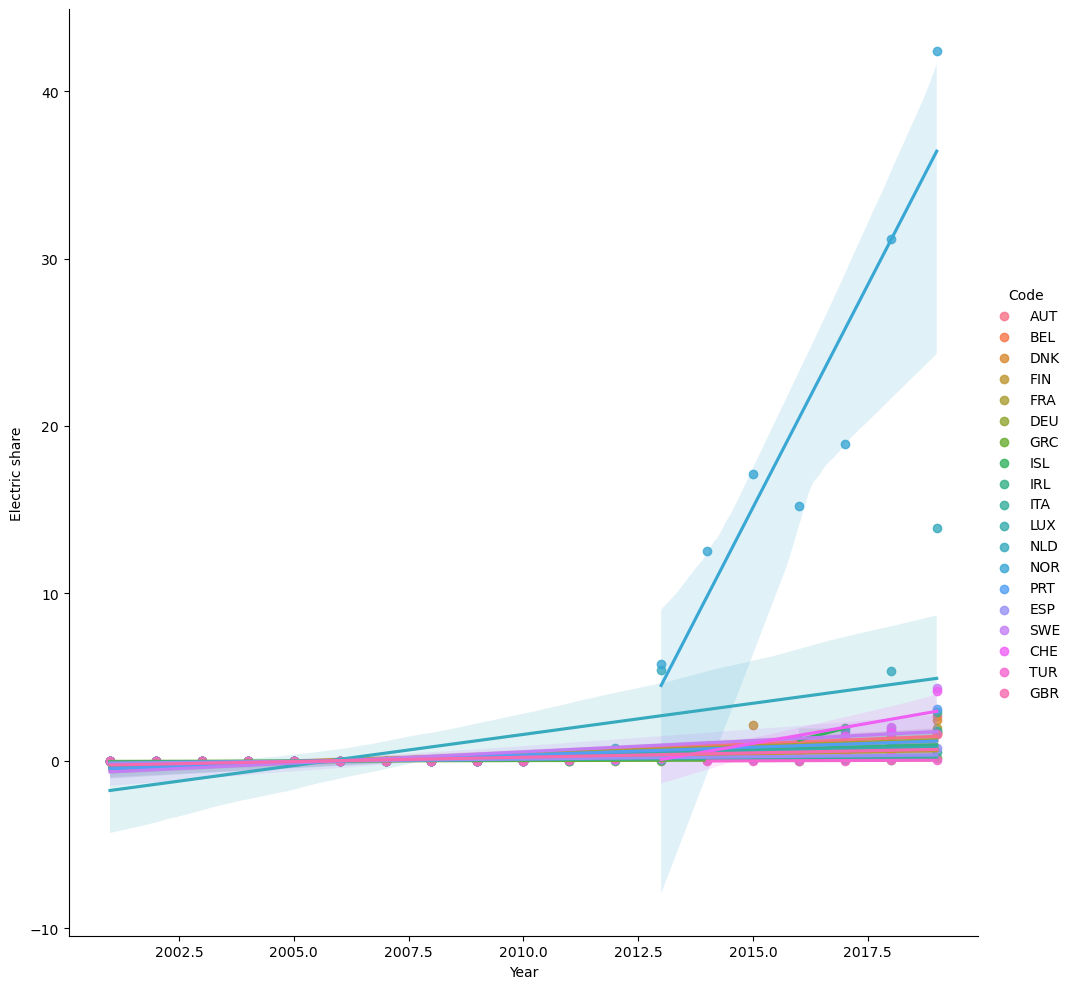

In [6]:
# plot the data
g = sns.lmplot(
    data=data,
    x="Year", y="battery_electric_share", hue="Code",
    height=10
)

g.set_axis_labels("Year", "Electric share")

In [7]:
mean_share = data.groupby('Year').battery_electric_share.mean()
mean_share

Year
2001    0.002670
2002    0.001603
2003    0.001014
2004    0.001830
2005    0.001750
2006    0.001069
2007    0.001297
2008    0.001454
2009    0.007472
2010    0.012039
2011    0.086408
2012    0.184212
2013    0.886629
2014    1.056311
2015    1.440816
2016    1.282073
2017    1.730872
2018    2.877609
2019    4.744333
2020    6.212288
Name: battery_electric_share, dtype: float64

In [22]:
sns.lineplot(data = mean_share)

<AxesSubplot:xlabel='Y Test (True values from test data)', ylabel='Predicted Y'>

## Training and Testing Data

In [9]:
data.columns

Index(['Entity', 'Code', 'Year', 'battery_electric_share'], dtype='object')

In [10]:
y = data['battery_electric_share']
X = data[['Year']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# test_size always be below 0.5 to get the best results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.19783422]


### Predicting test data

In [17]:
predictions = lm.predict( X_test)

In [18]:
data_compare = pd.DataFrame(data= {'actual values':y_test, 'predicted values': predictions})

In [19]:
data_compare['difference'] = data_compare['actual values'] - data_compare['predicted values']
data_compare

,actual values,predicted values,difference
273,0.776224,2.044064,-1.267839
8,0.012217,0.659224,-0.647007
293,0.000000,-0.329947,0.329947
130,0.042214,1.846229,-1.804016
204,0.157758,1.054893,-0.897134
...,...,...,...
55,0.707851,2.439732,-1.731881
247,0.000105,0.659224,-0.659119
85,0.000195,0.461390,-0.461195
234,0.347333,1.846229,-1.498896


In [21]:
plt.scatter(y_test,predictions, color='purple')
plt.xlabel('Y Test (True values from test data)')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

In [29]:
slope, intercept, r_value, p_value, std_err = linregress(data["Year"], data["battery_electric_share"])

In [28]:
from scipy.stats import linregress

In [30]:
f, ax = plt.subplots()
sns.scatterplot(x="Year", y="battery_electric_share", ax=ax, data=data)

<AxesSubplot:xlabel='Year', ylabel='battery_electric_share'>

In [31]:
ax.plot(range(2009, 2030), [i*slope + intercept for i in range(2009, 2030)], color="red")

In [34]:
ax.set_title("Electric share (simple predicion)")
ax.set(ylabel="Batter electric")
# f.savefig("test11.png", bbox_inches="tight")

[Text(24.000000000000007, 0.5, 'Batter electric')]

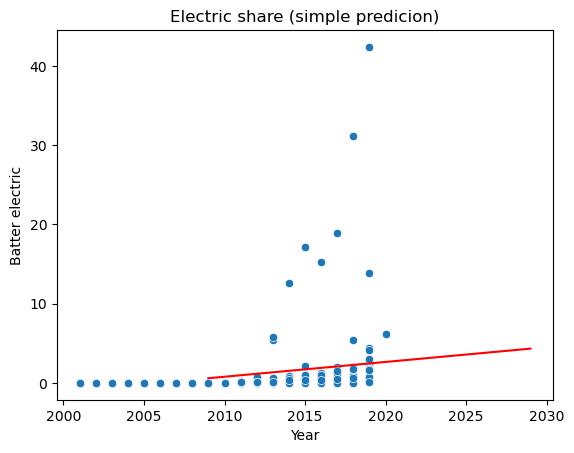

In [35]:
f

In [37]:
result = linregress(data["Year"], data["battery_electric_share"])
print(result.intercept, result.intercept_stderr)

-374.2098109318517 71.52533698549387


In [40]:
predict_y = intercept + slope * 2023
print(predict_y)

3.20538421504142
